In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sbn

In [ ]:
dataFrame = pd.read_csv("winequality-red.csv")

In [ ]:
dataFrame.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
dataFrame.shape

(1599, 12)

<ipython-input-7-cd48ea345008>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataFrame["alcohol"])


<Axes: xlabel='alcohol', ylabel='Density'>

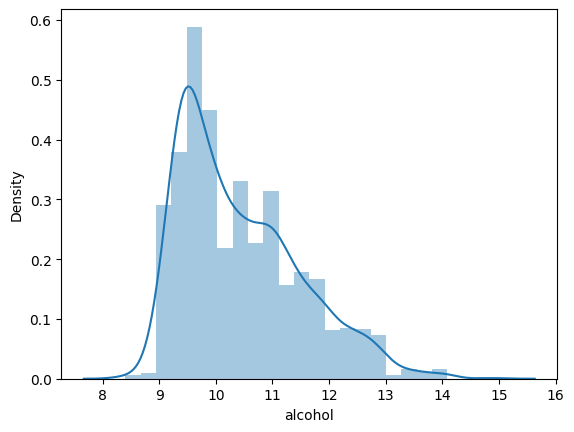

In [ ]:
sbn.distplot(dataFrame["alcohol"])

In [ ]:
dataFrame.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
y = dataFrame["alcohol"]
x = dataFrame.drop("alcohol",axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=15)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(20,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(20,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [ ]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=50,epochs=150)

Epoch 1/150
24/24 [==============================] - 1s 7ms/step - loss: 106.7124 - val_loss: 101.5136
Epoch 2/150
24/24 [==============================] - 0s 2ms/step - loss: 92.0983 - val_loss: 76.6874
Epoch 3/150
24/24 [==============================] - 0s 3ms/step - loss: 50.5837 - val_loss: 16.4614
Epoch 4/150
24/24 [==============================] - 0s 2ms/step - loss: 5.2176 - val_loss: 3.2282
Epoch 5/150
24/24 [==============================] - 0s 3ms/step - loss: 1.9364 - val_loss: 1.9803
Epoch 6/150
24/24 [==============================] - 0s 3ms/step - loss: 1.6262 - val_loss: 1.7895
Epoch 7/150
24/24 [==============================] - 0s 2ms/step - loss: 1.4632 - val_loss: 1.5905
Epoch 8/150
24/24 [==============================] - 0s 2ms/step - loss: 1.2844 - val_loss: 1.3797
Epoch 9/150
24/24 [==============================] - 0s 3ms/step - loss: 1.1309 - val_loss: 1.2026
Epoch 10/150
24/24 [==============================] - 0s 3ms/step - loss: 1.0153 - val_loss: 1.0838
E

In [ ]:
veri = model.history.history

<Axes: >

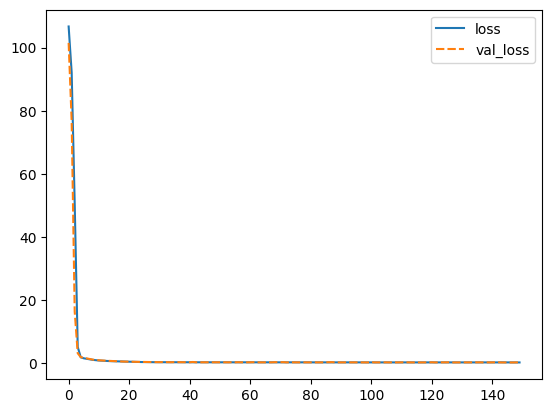

In [ ]:
sbn.lineplot(veri)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
tahminDizisi = model.predict(x_test)

13/13 [==============================] - 0s 1ms/step


In [ ]:
mean_absolute_error(y_test,tahminDizisi)

0.432463265101115

In [ ]:
mean_squared_error(y_test,tahminDizisi)

0.30968649718597524

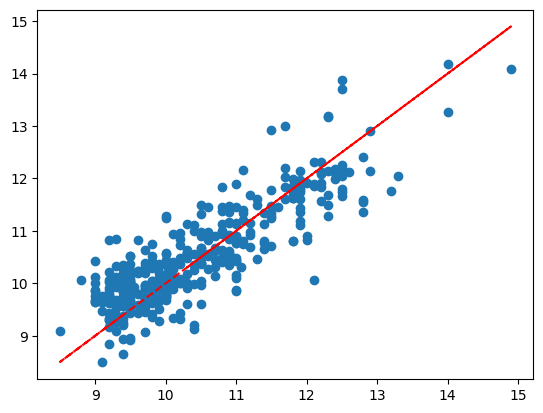

In [ ]:
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"r--")

In [ ]:
wine_alcohol = [[7.4,	0.70,	0.00,	1.9,	0.076,	11.0,	34.0,	0.9978,	3.51,	0.56,	5]]

In [ ]:
wine_alcohol = scaler.transform(wine_alcohol)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
model.predict(wine_alcohol)

1/1 [==============================] - 0s 14ms/step


array([[9.591414]], dtype=float32)